In [11]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 全局变量

In [12]:
batch_size=512
lr  = 0.001
epoch_num = 200
num_workers=0

# 构造数据集

In [18]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,
                                         num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,
                                        num_workers=num_workers)
print("训练集数量:", len(mnist_train))
print("测试集数量:", len(mnist_test))

训练集数量: 60000
测试集数量: 10000


# 定义激活函数 定义网络结构 定义网络初始化参数
# 定义损失函数 定义优化器

In [19]:
import random

class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True, train_ratio=0.8, random_seed=42):
        self.mnist = torchvision.datasets.MNIST(root=root, train=True, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

        # 设置随机种子
        random.seed(random_seed)
        torch.manual_seed(random_seed)

        # 获取数据集大小
        dataset_size = len(self.mnist)

        # 计算训练集和测试集的大小
        train_size = int(train_ratio * dataset_size)
        test_size = dataset_size - train_size

        # 根据训练集和测试集的大小划分数据集
        if train:
            self.mnist, _ = torch.utils.data.random_split(self.mnist, [train_size, test_size])
        else:
            _, self.mnist = torch.utils.data.random_split(self.mnist, [train_size, test_size])

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

# 定义训练集和测试集的数据加载器
batch_size = 64
num_workers = 0
mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                           download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                          download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

print("训练集数量:", len(mnist_train))
print("测试集数量:", len(mnist_test))


训练集数量: 48000
测试集数量: 12000


# 定义早停机制

In [15]:

early_stop_len = 5
max = float('inf')
t = 0

# 训练与实验早停机制

In [16]:
import time

train_loss =[]
test_loss = []
train_acc=[]
test_acc= []
start_time = time.time()
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = loss(y_hat,y)
        sgd.zero_grad()
        l.backward()
        sgd.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss.append(train_loss_mean)
    train_acc.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net(x)
        l = loss(y_hat,y)
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss.append(test_loss_mean)
    test_acc.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
    # 早停代码实现 在文档内没有找到相关API，故使用手动实现
    if test_loss_mean < max:
        max = test_loss_mean
        t = 0
    else:
        t += 1
        if t >= early_stop_len:
            print('Early stopping.')
            break
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


epoch: 1 
 train_loss: 2.301938105654973 train_acc: 0.12229082661290322 
 test_loss: 2.301821418430494 test_acc: 0.11302649456521739
epoch: 2 
 train_loss: 2.3006216531158774 train_acc: 0.12300487231182795 
 test_loss: 2.3019166303717573 test_acc: 0.14232336956521738
epoch: 3 
 train_loss: 2.299519743970645 train_acc: 0.146484375 
 test_loss: 2.303163310755854 test_acc: 0.16499660326086957
epoch: 4 
 train_loss: 2.2974924451561383 train_acc: 0.12565104166666666 
 test_loss: 2.304991628812707 test_acc: 0.09926970108695653
epoch: 5 
 train_loss: 2.2940976209537958 train_acc: 0.11735551075268817 
 test_loss: 2.304898573004681 test_acc: 0.10003396739130435
epoch: 6 
 train_loss: 2.2897699725243355 train_acc: 0.1127982190860215 
 test_loss: 2.3089132619940718 test_acc: 0.11353600543478261
Early stopping.
Training time: 66.78 seconds


# 结论评估与数据可视化
随着训练的进行，模型在训练集上的损失和准确率都在改善，表明模型在训练数据上得到了优化。
在第12个epoch时，验证集上的损失下降到最低值，准确率达到97.55%。之后的几个epoch中，虽然损失和准确率有所波动，但没有显著的改善。
在第17个epoch时，验证集上的准确率达到了最高值97.79%，之后准确率有轻微下降。
由于在连续5个epoch中准确率没有提高，早停被触发，训练停止。

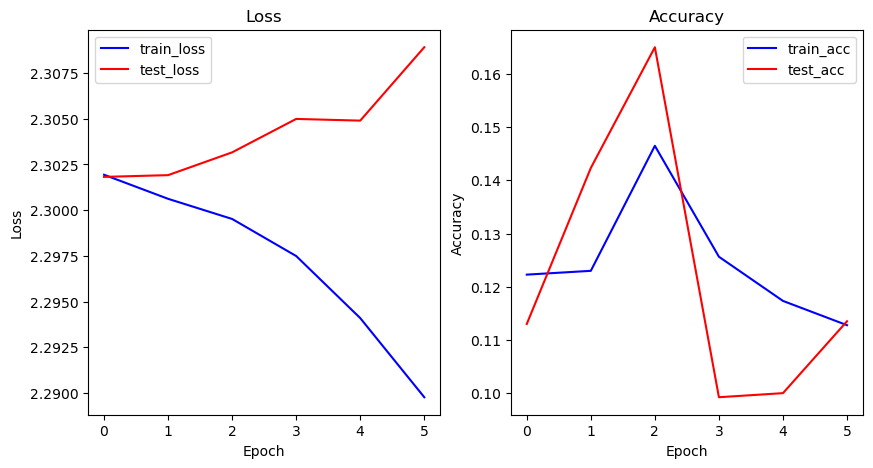

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, 'b-',label="train_loss")
plt.plot(test_loss, 'r-' ,label="test_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, 'b-',label="train_acc")
plt.plot(test_acc, 'r-' ,label="test_acc")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()